**Autism Detection using VGG16**

**Overview**

This repository contains code for detecting autism using a deep learning model based on the VGG16 architecture. Autism spectrum disorder (ASD) is a developmental disorder characterized by difficulties with social interaction and communication, and by restricted and repetitive behavior. The model is trained to classify images into two categories: ASD (autism spectrum disorder) and non-ASD.

**Workflow**

1) Mounting Google Drive: This block mounts Google Drive to access the dataset stored there.

2) Fetching Directories: Fetches directories for the train, test, and validation datasets.

3) Fetching Data: Loads data from the train, test, and validation directories.

4) Data Inspection: Displays sample images from the dataset to ensure successful access.

5) Data Augmentation: Augments the dataset to increase its size, rescales images, and sets batch size to 10. Shuffle is set to false for consistency in training. Class mode is set to binary for binary classification.

6) Importing Pre-trained Model: Imports the VGG16 pre-trained model.

7) Freezing Layers: Freezes the weights of the pre-trained VGG16 layers.

8) Modifying Last Layer: Modifies the last layer of the VGG16 model for binary classification.

9) Model Summary: Displays a summary of the modified VGG16 model architecture.

10) Training with Callbacks: Trains the model using callbacks for early stopping and saving the best model based on improved accuracy.

11) Saving Model: Saves the trained model.

12) Prediction: Uses the trained model to predict whether an image contains ASD or non-ASD.

13) Training without Early Stopping: Trains the model without early stopping.

14) Saving Model: Saves the trained model without early stopping.

15) Plotting Model Loss: Plots the loss curve during model training.

16) Plotting Model Accuracy: Plots the accuracy curve during model training.

17) Calculating Precision, Recall, and F1 Score: Computes precision, recall, and F1 score metrics for model evaluation.

18) Confusion Matrix (Test Set): Generates a confusion matrix for the test dataset.

19) Misclassification Analysis (Test Images): Analyzes misclassified images from the test dataset.

20) Confusion Matrix (Train Set): Generates a confusion matrix for the train dataset.

21) Misclassification Analysis (Train Images): Analyzes misclassified images from the train dataset.

22) Confusion Matrix (Validation Set): Generates a confusion matrix for the validation dataset.

23) Misclassification Analysis (Validation Images): Analyzes misclassified images from the validation dataset.

**Dependencies**

1) TensorFlow
2) Keras
3) NumPy
4) Matplotlib

**Usage**

1) Clone the repository.
2) Set up your environment with the required dependencies.
3) Follow the provided Jupyter Notebook or Python scripts for step-by-step execution.

**Dataset**

The dataset used in this project is stored in Google Drive. It contains images of individuals with and without autism spectrum disorder(Dataset source -> Kaggle).


**Author: Love Kumar Yadav**

**Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Fetching directories in variables train_dsr,validation_dir,test_dir**

In [2]:
import os
base_dir = '/content/gdrive/MyDrive/ASD_v4'
train_dir = os.path.join(base_dir, '/content/gdrive/MyDrive/ASD_v4/train')
validation_dir = os.path.join(base_dir, '/content/gdrive/MyDrive/ASD_v4/valid')
test_dir = os.path.join(base_dir, '/content/gdrive/MyDrive/ASD_v4/test')

# Directory with our training ASD pictures
train_asd_dir = os.path.join(train_dir, '/content/gdrive/MyDrive/ASD_v4/train/Autistic')

# Directory with our training NASD pictures
train_nasd_dir = os.path.join(train_dir, '/content/gdrive/MyDrive/ASD_v4/train/Non_Autistic')

# Directory with our validation ASD pictures
validation_asd_dir = os.path.join(validation_dir, '/content/gdrive/MyDrive/ASD_v4/valid/Autistic')

# Directory with our validation NASD pictures
validation_nasd_dir = os.path.join(validation_dir, '/content/gdrive/MyDrive/ASD_v4/valid/Non_Autistic')

# Directory with our TEST ASD pictures
test_asd_dir = os.path.join(test_dir, '/content/gdrive/MyDrive/ASD_v4/test/Autistic')

# Directory with our TEST NASD pictures
test_nasd_dir = os.path.join(test_dir, '/content/gdrive/MyDrive/ASD_v4/test/Non_Autistic')


**Showing some fetched data**

In [3]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_asd_fnames = os.listdir( train_asd_dir )
train_nasd_fnames = os.listdir( train_nasd_dir )


next_asd_pix = [os.path.join(train_asd_dir, fname)
                for fname in train_asd_fnames[ pic_index-8:pic_index]
               ]

next_nasd_pix = [os.path.join(train_nasd_dir, fname)
                for fname in train_nasd_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_asd_pix+next_nasd_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Data Augmentation to make more photos**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD_v4/train',
                                             target_size=(224,224),
                                             batch_size=16,
                                             class_mode='binary')
#Validation Set
valid_set = valid_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD_v4/valid',
                                           target_size=(224,224),
                                           batch_size = 16,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD_v4/test',
                                            target_size=(224,224),
                                            batch_size = 16,
                                            class_mode='binary',
                                            shuffle=False)



Found 2526 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.



**Pretrained Resnet 50 Model Importing**

In [ ]:
# from tensorflow.keras.applications import ResNet50
# # from keras.applications.resnet50 import ResNet50

# base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights=None)

**Basic Resnet50 Weight Not updated**

In [ ]:
# #To set the layers to non-trainable (weights will not be updated)
# for layer in base_model.layers:
#     layer.trainable = True

**Last layer changed as per below**

In [ ]:
# from tensorflow.keras import layers
# import tensorflow as tf

# # Flatten the output layer to 1 dimension
# x = layers.Flatten()(base_model.output)

# # Add a fully connected layer with 512 hidden units and ReLU activation
# x = layers.Dense(512, activation='relu')(x)

# # Add a dropout rate of 0.5
# x = layers.Dropout(0.5)(x)

# # Add a final sigmoid layer with 1 node for classification output
# x = layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.models.Model(base_model.input, x)

# #RMS optimizer
# #model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

# #adam optimizer
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
# model.summary()

In [ ]:
#To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.

#Often, the first sign of no improvement may not be the best time to stop training.use patience argument. rule of thumb to make it 10% of number of epoch.

#An additional callback is required that will save the best model observed during training for later use. This is the ModelCheckpoint callback.

# from keras.callbacks import ModelCheckpoint, EarlyStopping
# resnet_best = model.fit(train_set, validation_data = valid_set, steps_per_epoch = 100, epochs = 100,verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            # ModelCheckpoint(filepath='/content/gdrive/MyDrive/DNN Keras Models/resnet50_imagenet_adam.h5', save_best_only=True)])

In [ ]:
# model.save('/content/gdrive/MyDrive/Models/proj_resnet.h5')

In [ ]:
# resnet = model.fit(train_set, validation_data = valid_set, epochs = 100)

In [5]:
! pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-2p4cc6qo
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-2p4cc6qo
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20031 sha256=35ab72b2fbe59e349b0c5556203b17b41980e9cc897508e894040ee5c713fc94
  Stored in directory: /tmp/pip-ephem-wheel-cache-58lofi7_/wheels/f5/13/cb/b1dbd79043c5a389742e422859b0b663adcd7b5c220928c339
Successfully built image-classifiers


In [8]:
from tensorflow.keras import layers
import tensorflow as tf

from classification_models.keras import Classifiers
from keras.callbacks import ModelCheckpoint, EarlyStopping

ResNet50, preprocess_input = Classifiers.get('resnet50')

base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=[base_model.input], outputs=[output])

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(train_set, validation_data = valid_set, epochs = 100)
resnet_best = model.fit(train_set, validation_data = valid_set, epochs = 100,verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='/content/gdrive/MyDrive/DNN Keras Models/resnet50_imagenet_adam.h5', save_best_only=True)])

94592056/94592056 [==============================] - 1s 0us/step
Epoch 1/100
158/158 [==============================] - 516s 3s/step - loss: 0.5257 - accuracy: 0.7280 - val_loss: 0.6985 - val_accuracy: 0.5375
Epoch 2/100
158/158 [==============================] - 52s 327ms/step - loss: 0.3960 - accuracy: 0.8207 - val_loss: 0.7261 - val_accuracy: 0.4000
Epoch 3/100
158/158 [==============================] - 48s 306ms/step - loss: 0.3064 - accuracy: 0.8678 - val_loss: 0.8571 - val_accuracy: 0.5125
Epoch 4/100
158/158 [==============================] - 55s 350ms/step - loss: 0.2227 - accuracy: 0.9137 - val_loss: 0.6623 - val_accuracy: 0.6375
Epoch 5/100
158/158 [==============================] - 51s 318ms/step - loss: 0.1821 - accuracy: 0.9276 - val_loss: 0.9286 - val_accuracy: 0.6125
Epoch 6/100
158/158 [==============================] - 51s 321ms/step - loss: 0.1417 - accuracy: 0.9462 - val_loss: 0.5365 - val_accuracy: 0.7500
Epoch 7/100
158/158 [==============================] - 55s 34

In [9]:
model.save('/content/gdrive/MyDrive/Models/resnet50_best.h5')

In [ ]:
#model for plotting
inception = model.fit(train_set, validation_data = valid_set, steps_per_epoch = 100, epochs = 100)

In [ ]:
model.save('/content/gdrive/MyDrive/Models/resnet50_100.h5')

**Model Loss Plotting**

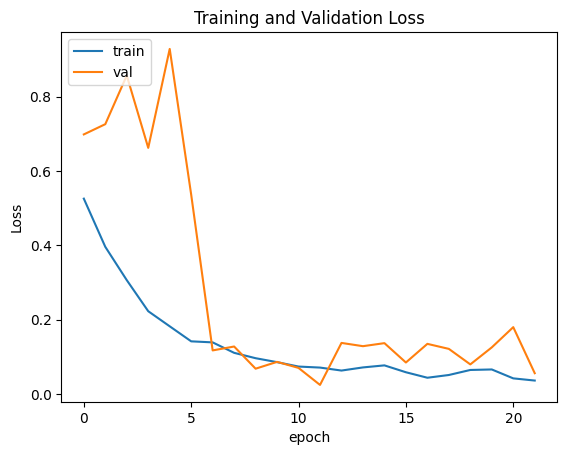

In [10]:
import keras
from matplotlib import pyplot as plt


plt.plot(resnet_best.history['loss'])
plt.plot(resnet_best.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model Accuracy Plotting**

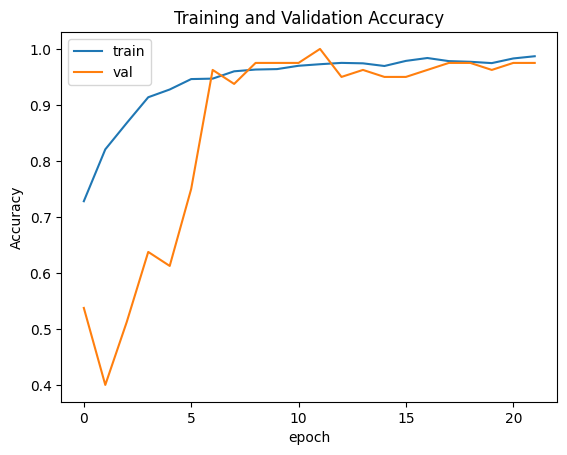

In [15]:
import keras
from matplotlib import pyplot as plt


plt.plot(resnet_best.history['accuracy'])
plt.plot(resnet_best.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Precision, Recall, F1 score**

In [31]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert the predicted probabilities to binary predictions
y_pred_binary = (ytesthat > 0.5).astype(int)

# Get the true labels from the test set
y_true = test_set.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_binary)

# Calculate precision
precision = precision_score(y_true, y_pred_binary)

# Calculate recall
recall = recall_score(y_true, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_binary)

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

<ipython-input-31-82d0e57657e0>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


Test Accuracy: 0.9714285714285714
Precision: 0.9782608695652174
Recall: 0.9642857142857143
F1 Score: 0.9712230215827338


**Prediction of an Image of Test Set**

1/1 [==============================] - 0s 23ms/step


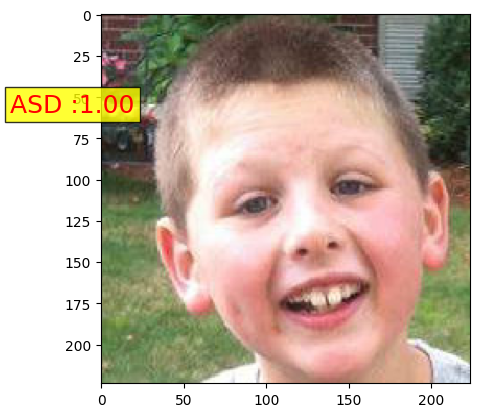

In [17]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/gdrive/MyDrive/ASD_v4/test/Autistic/ta.001.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

**Confusion Matrix of Test Set**

In [18]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

<ipython-input-18-83125e26fe9f>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [20]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())


Total misclassified image from 280 Testing images : 8


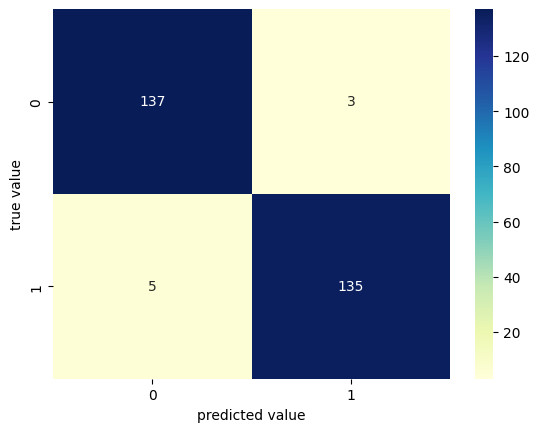

In [21]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Confusion Matrix of Train Set**

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

#Training Set
train_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD_v4/train',
                                             target_size=(224,224),
                                             batch_size=10,
                                             shuffle=False,
                                             class_mode='binary')

Found 2526 images belonging to 2 classes.


In [23]:
import pandas as pd
train_set.reset
ytrainhat = model.predict_generator(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})

<ipython-input-23-86d4ed593533>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytrainhat = model.predict_generator(train_set)


In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [25]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2526 Training images : %d'%misclassified['y'].count())

Total misclassified image from 2526 Training images : 17


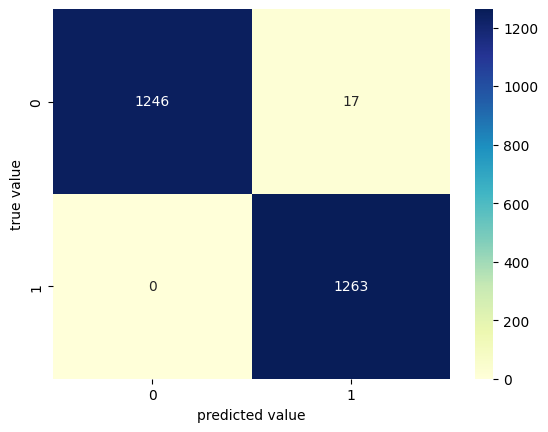

In [26]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Confusion Matrix of Validation Set**

In [27]:
import pandas as pd
valid_set.reset
yvalidhat = model.predict_generator(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})

<ipython-input-27-853db96b44e2>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yvalidhat = model.predict_generator(valid_set)


In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [29]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 80 Validation images : 2


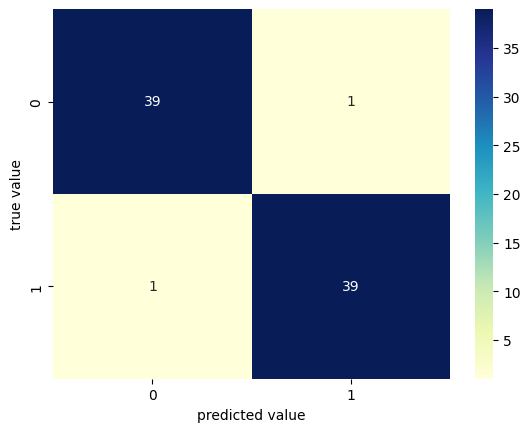

In [30]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');